In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
from scipy.fftpack import fft,fftfreq,ifft
import scipy.integrate as it
# import seaborn
# seaborn.set()


In [2]:
data = pd.read_csv('../Raw_data/15min_sam.csv')
data_o = data
k_data = pd.read_csv('../Raw_data/walk_kevin.csv')
# data, b = np.split(data, int(.3*len(data)))
# k_data, b = np.split(k_data, int(.3*len(k_data)))
# data = data_o.iloc[int(.2*len(data_o)):int(.40*len(data_o))]
data2 = data_o.iloc[int(0.7*len(data_o)):int(.80*len(data_o))]
# k_data = k_data.iloc[int(.50*len(k_data)):int(.51*len(k_data))]

k_fs = 100
k_T = 1/k_fs
k_L = int(k_data.shape[0])

fs2 = 400
T2 = 1/fs2
L2 = int(data2.shape[0])

FS = 400
T = 1/FS
L = int(data.shape[0])
# time vector
t =  pd.Series(list(range(L)))
# type(L)
# type(t[0])
t = (t * T).values

# T2
L2


90018

In [3]:
time_axis = data['time']

x = data['gFx']
y = data['gFy']
y2 = data2['gFy']
z = data['gFz']
total = data['TgF']

k_y = k_data['gFy']
k_time = k_data['time']


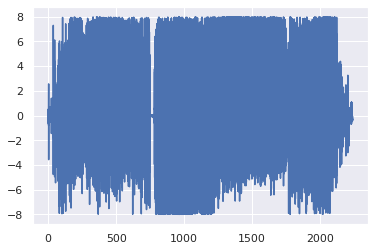

In [89]:
# plt.subplot(1,3)
# plt.plot(x)
# plt.subplot(2,3)
# plt.plot(y)
# plt.subplot(3,3)
# plt.plot(z)
# plt.show()


# plt.figure()
# plt.xlim(500,505)
plt.plot(time_axis,x)
# 
# plt.figure()
# plt.plot(y)
# plt.figure()
# plt.plot(z)
# plt.show()

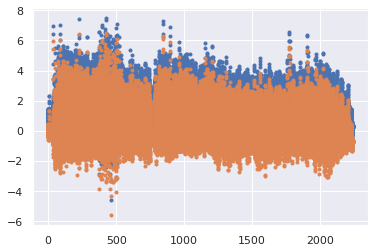

In [223]:
plt.plot(time_axis,y,'.')

# plt.plot(time_axis,(y-1),'.')

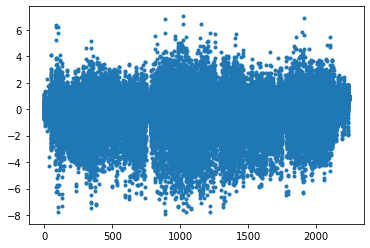

In [6]:
plt.plot(time_axis,z,'.')

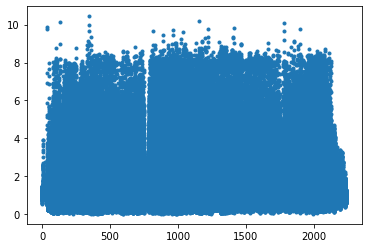

In [7]:
plt.plot(time_axis,total,'.')

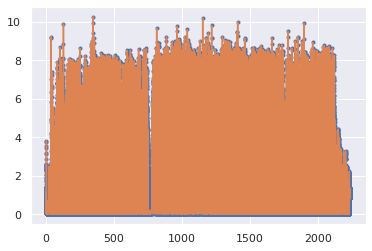

In [222]:
data['TgF'] = (x**2+(y-1)**2+z**2)**(1/2)



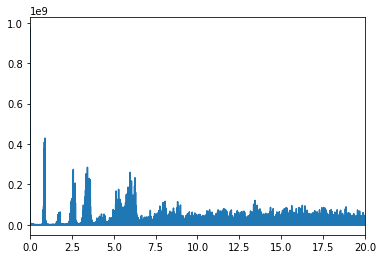

In [8]:

x_fft = fft(x.values)
# T_fft = 
# # poer spectral desity
x_PSD_o = abs(x_fft)**2
# d = time_axis[1]-time_axis[0]
freq = fftfreq(L,d = T)
i = freq > 0
plt.plot(freq[i],x_PSD_o[i])
plt.xlim(0,20)
plt.show()





In [199]:
b,a = signal.butter(1,0.04,btype = 'lowpass',analog = False)
low_pass_x = signal.filtfilt(b,a,x)

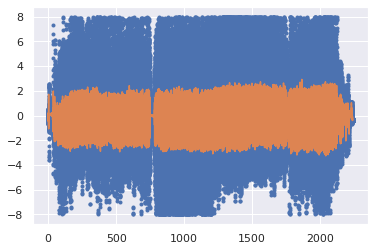

In [232]:
# plt.xlim(900,1100)

plt.plot(time_axis,x,'.')
plt.plot(time_axis,low_pass_x)
# plt.ylim(0.9,1.2)


array([6.83765964e+09, 9.77985303e+08, 1.07620146e+08, ...,
       1.20531734e+08, 1.07620146e+08, 9.77985303e+08])

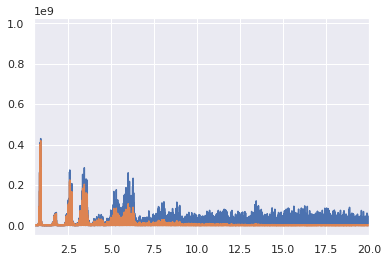

In [201]:
x_fft = fft(low_pass_x)
# # poer spectral desity
x_PSD = np.abs(x_fft)**2
freq = fftfreq(L,d = T)
i = freq > 0
plt.plot(freq[i],x_PSD_o[i])
plt.plot(freq[i],x_PSD[i])

plt.xlim(0.5,20)
# plt.show()
x_PSD


In [226]:
b,a = signal.butter(4,0.02,btype = 'lowpass',analog = False)
low_pass_y = signal.filtfilt(b,a,y)

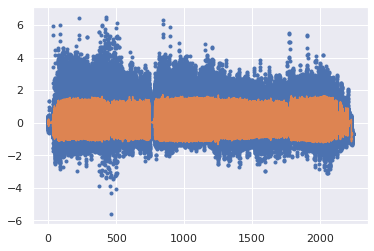

In [229]:
# plt.xlim(1000,1005)
plt.plot(time_axis,y-1,'.')
plt.plot(time_axis,low_pass_y-1)
# plt.hist(low_pass_y)

(0.5, 10.0)

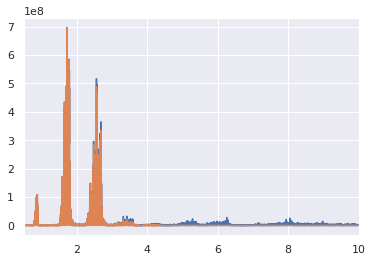

In [154]:
y_fft = fft(y.values)
y_PSD_o = np.abs(y_fft)**2

y_fft = fft(low_pass_y)
y_PSD = np.abs(y_fft)**2
plt.plot(freq[i],y_PSD_o[i])
plt.plot(freq[i],y_PSD[i])
plt.xlim(0.5,10)



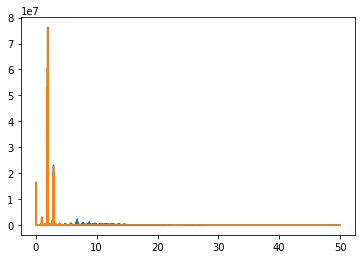

In [15]:
# plt.plot(k_time,k_y,'.')
kb,ka = signal.butter(4,0.1,btype = 'lowpass',analog = False)


k_low_pass_y = signal.filtfilt(kb,ka,k_y)

# plt.plot(k_time,k_low_pass_y)
k_y_fft = fft(k_low_pass_y)
k_y_PSD = np.abs(k_y_fft)**2
k_freq = fftfreq(k_L,d = k_T)
k_i = k_freq > 0
k_y_fft_o = fft(k_y.values)
k_y_PSD_o = np.abs(k_y_fft_o)**2
plt.plot(k_freq[k_i],k_y_PSD_o[k_ｉ])
plt.plot(k_freq[k_i],k_y_PSD[k_ｉ])



# len(k_i)
# len(k_freq)
# len(k_y_PSD)
# plt.xlim(0,20)
# k_y_PSD
# k_y.max()


0.0
3.4658229074350344e-20


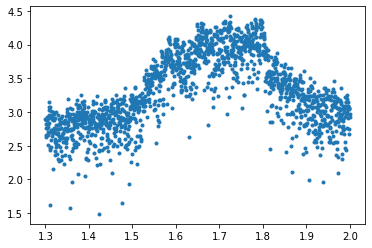

In [16]:
freq2 = fftfreq(L2,d = T2)
low_pass_y2 = signal.filtfilt(b,a,y2)
y_fft2 = fft(low_pass_y2)
y_PSD2 = np.abs(y_fft2)**2
i = (freq < 5) & (freq > 0)
i2 = (freq2 < 5) & (freq2 > 0)
k_i = (k_freq < 5) & (k_freq > 0)
print(stats.levene(low_pass_y, k_low_pass_y).pvalue)
stats.f_oneway(low_pass_y,k_low_pass_y)
# plt.hist(low_pass_y)
# plt.hist(k_low_pass_y)
# plt.hist(y_PSD[i])
cond = (freq<2) & (freq>1.3)
ypeak = y_PSD[cond]
# y_PSD[i]
# y_PSD[i]
print(stats.normaltest(np.log10(np.sqrt(ypeak))).pvalue)
# plt.hist(ypeak)
log = (np.log10(np.sqrt(ypeak)))

df = {'frequency':freq[cond],'amount':log}
df = pd.DataFrame(data = df)
plt.plot(df.frequency.values,df.amount.values,'.')

# print(stats.mannwhitneyu(y_PSD[i], k_y_PSD[k_i]).pvalue)
# print(stats.mannwhitneyu(y_PSD[i], y_PSD2[i2]).pvalue)
# print(stats.mannwhitneyu(y_PSD[i], k_y_PSD[k_i]).pvalue)
# y_PSD2[i2]




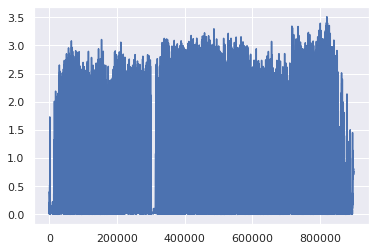

In [231]:
total = (low_pass_x**2+(low_pass_y-1)**2)**(1/2)
plt.plot(total)

In [1]:
low_pass_x = pd.Series(low_pass_x)
# velocity = it.cumtrapz((low_pass_x[low_pass_x>0]),initial=0)

velocity = it.cumtrapz(low_pass_x)
low_pass_y = low_pass_y-1
# dy = np.trapz(y, x)
# dy
# plt.plot(dy)
# plt.plot(velocity)
# plt.hist(velocity)
time_low = pd.DataFrame(data = {'time':time_axis,'x':low_pass_x})
time_low['second'] = time_low['time'].apply(int)
time_low['x'] = time_low['x']*9.81
time_low['abs(x)'] = time_low['x'].apply(np.abs)



# y_velocity = it.cumtrapz(low_pass_y,time_axis,initial = 0)

# plt.plot(y_velocity)
time_low['next_time'] = time_low['time'].shift(-1)
time_low['time_diff'] = time_low['next_time']-time_low['time']

velocity = it.cumtrapz(time_low['x'],time_low['time_diff'],initial = 0)

max_time_low = time_low.groupby('second').max().reset_index()
sum_time_low = time_low.groupby('second').sum().reset_index()

# print(sum_time_low.describe())
max_time_low['isSame'] = max_time_low['abs(x)'] == max_time_low['x']
# sum_time_low['abs(x)'] = sum_time_low[sum_time_low['isSame']==False]['abs(x)']*-1
max_time_low.loc[max_time_low['isSame']==False,"abs(x)"] = -1 *max_time_low['abs(x)']
    

print(max_time_low.iloc[800:1100])
velocity = it.cumtrapz(max_time_low['abs(x)'],sum_time_low['time_diff'],initial = 0)

# sum_time_low['second']
# plt.plot(sum_time_low['second'],velocity)
# sum_time_low
# plt.xlim(900,1100)
plt.hist(velocity)

NameError: name 'pd' is not defined